<a href="https://colab.research.google.com/github/N335HMAVA5UD3V/Cognorise-infotrch/blob/main/Customer_personality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1> <font color='orange'>**CUSTOMER PERSONALITY ANALYSIS** </center>
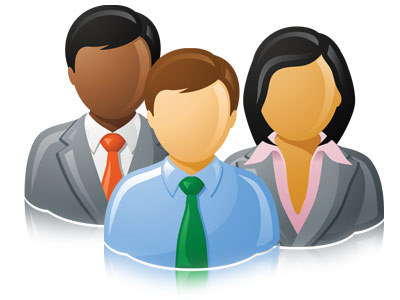

# <font color='orange'>**Importing the Libraries** </center>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


#<font color='orange'>**Importing data** </center>

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CognoRise/costomer personality/marketing_campaign.csv',sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0



#<h1> <center> <font color='orange'>**ATTRIBUTES** </center>

**people**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income  
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

**Target**
* Need to perform clustering to summarize customer segments.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df=df.dropna()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


#<h1> <center> <font color='orange'>**Column wise Analysis** </center>

In [ ]:
len(df.ID.unique())

2216

Addibg a new column "age" based on birth year

In [ ]:
df['Age'] = 2024-df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,57
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,43
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,68


In [ ]:
df.drop(['ID','Year_Birth'],axis=1,inplace=True)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,67
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,70
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,3,11,0,59
3,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,3,11,0,40
4,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,...,0,0,0,0,0,0,3,11,0,57
2236,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,...,0,0,0,1,0,0,3,11,0,78
2237,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,...,0,1,0,0,0,0,3,11,0,43
2238,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,...,0,0,0,0,0,0,3,11,0,68


**Column : Education**

In [ ]:
df.Education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Text(0.5, 0, 'Education')

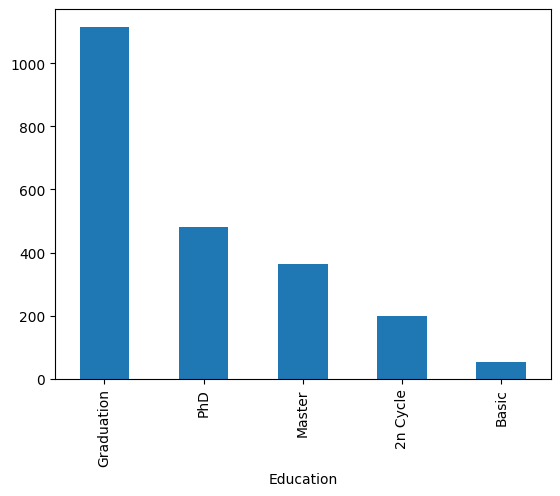

In [ ]:
df.Education.value_counts().plot(kind='bar')
plt.xlabel("Education")

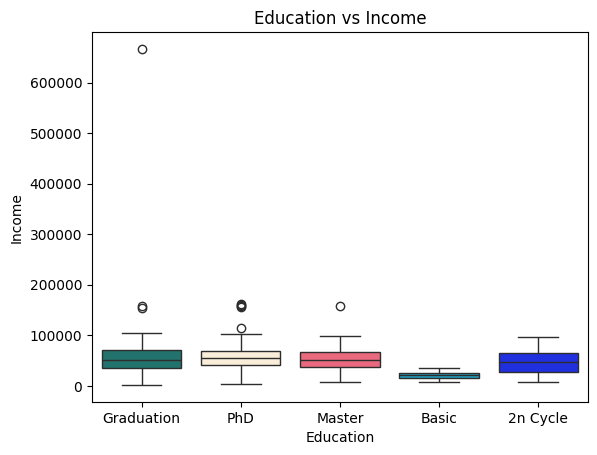

In [ ]:
color_dict = ({'Graduation':'#158078','Master':'#ff5470','PhD':'#ffeed4','2n Cycle':'#0015ff','Basic':'#07afd5'})
sns.boxplot(x='Education', y='Income', data=df, palette = color_dict)
plt.title("Education vs Income")
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

we have to encode this column ...we choose 'Basic','2n Cycle',and 'Graduation' as 0 and 'phD' and 'Master' as 1

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
PostGrad = []
for item in df['Education']:
  if item == 'phD' or item == 'Master':
    PostGrad.append(1)
  else:
    PostGrad.append(0)

df.insert(2,'PostGrad',PostGrad)
df.drop(['Education'],inplace=True,axis=1)
df

,Marital_Status,PostGrad,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,Single,0,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,67
1,Single,0,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,70
2,Together,0,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,3,11,0,59
3,Together,0,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,3,11,0,40
4,Married,0,58293.0,1,0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Married,0,61223.0,0,1,13-06-2013,46,709,43,182,...,0,0,0,0,0,0,3,11,0,57
2236,Together,0,64014.0,2,1,10-06-2014,56,406,0,30,...,0,0,0,1,0,0,3,11,0,78
2237,Divorced,0,56981.0,0,0,25-01-2014,91,908,48,217,...,0,1,0,0,0,0,3,11,0,43
2238,Together,1,69245.0,0,1,24-01-2014,8,428,30,214,...,0,0,0,0,0,0,3,11,0,68


**Column : Marital Status**

In [ ]:
df.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Text(0.5, 0, 'Marital status')

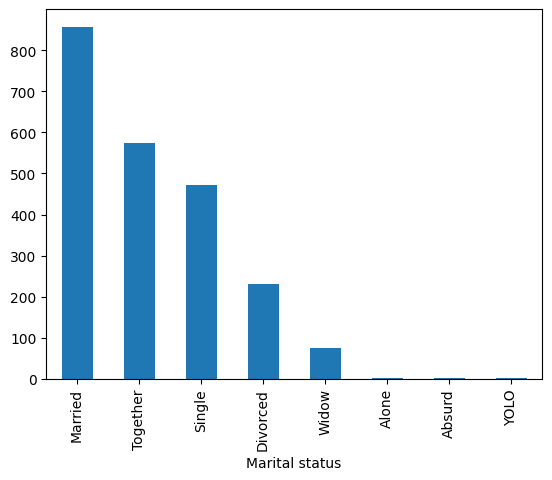

In [ ]:
df.Marital_Status.value_counts().plot(kind='bar')
plt.xlabel("Marital status")

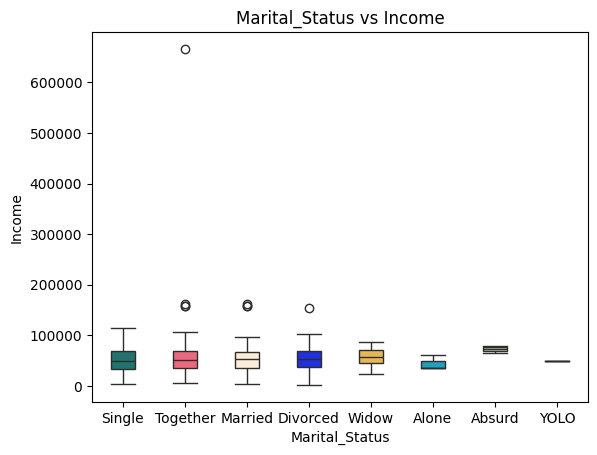

In [ ]:
color_dict = ({'Single':'#158078','Together':'#ff5470','Married':'#ffeed4','Divorced':'#0015ff','Alone':'#07afd5','Absurd':'#bccfb1','YOLO':'#ff9687','Widow':'#ffbe3d'})
sns.boxplot(x='Marital_Status', y='Income',widths = 0.4, data=df,palette=color_dict)
plt.title("Marital_Status vs Income")
plt.xlabel('Marital_Status')
plt.ylabel('Income')
plt.show()

by considering 'married' and 'together' relationship as married and remaining as single as numeric type using 1 and 0

In [ ]:
couple = []
for item in df['Marital_Status']:
  if item == 'Married' or item == 'Together':
    couple.append(1)
  else:
    couple.append(0)

df.insert(3,'Couple',couple)
df.drop(['Marital_Status'],inplace=True,axis=1)
df

,PostGrad,Income,Couple,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,0,58138.0,0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,67
1,0,46344.0,0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,70
2,0,71613.0,1,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,3,11,0,59
3,0,26646.0,1,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,3,11,0,40
4,0,58293.0,1,1,0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,1,0,1,13-06-2013,46,709,43,182,...,0,0,0,0,0,0,3,11,0,57
2236,0,64014.0,1,2,1,10-06-2014,56,406,0,30,...,0,0,0,1,0,0,3,11,0,78
2237,0,56981.0,0,0,0,25-01-2014,91,908,48,217,...,0,1,0,0,0,0,3,11,0,43
2238,1,69245.0,1,0,1,24-01-2014,8,428,30,214,...,0,0,0,0,0,0,3,11,0,68


Text(0.5, 0, 'Couple')

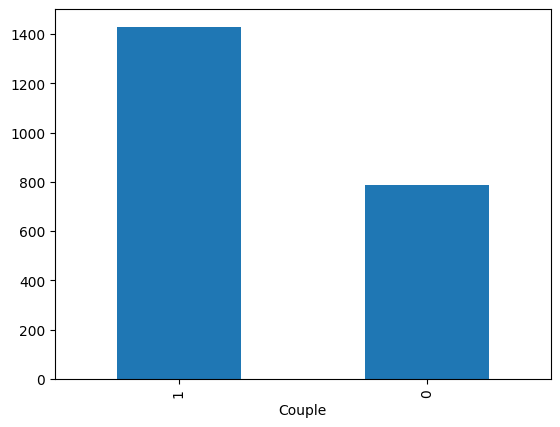

In [ ]:
df.Couple.value_counts().plot(kind='bar')
plt.xlabel("Couple")

**Column: Income**

lets see the distribution of age with income

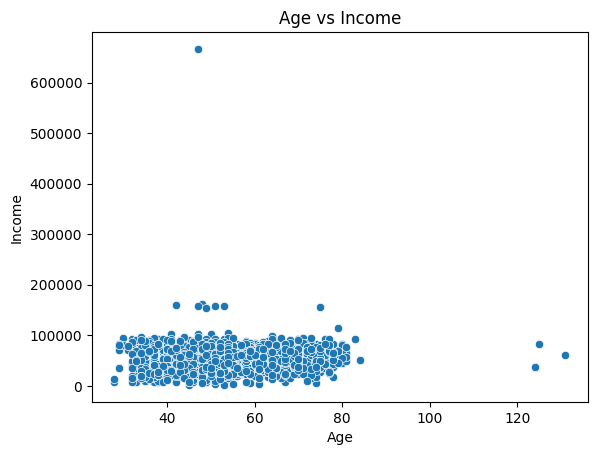

In [ ]:
sns.scatterplot(x='Age', y='Income', data=df)
plt.title("Age vs Income")
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

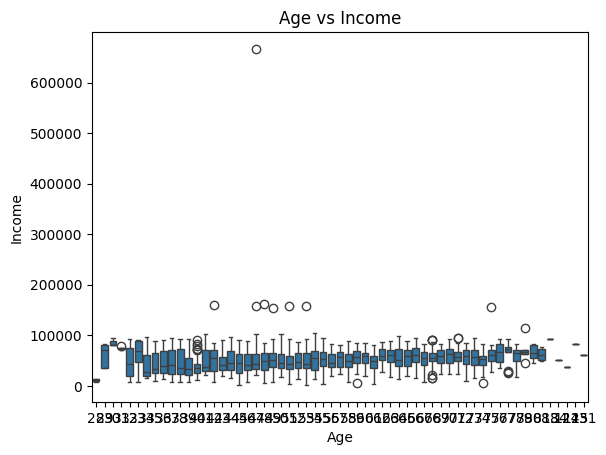

In [ ]:
sns.boxplot(x='Age',y='Income',data=df)
plt.title("Age vs Income")
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

some outliers are there.We have to remove this

In [ ]:
df = df[df['Age'] <= 100]
df = df[df['Income'] <=300000]
df

,PostGrad,Income,Couple,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,0,58138.0,0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,67
1,0,46344.0,0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,70
2,0,71613.0,1,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,3,11,0,59
3,0,26646.0,1,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,3,11,0,40
4,0,58293.0,1,1,0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,1,0,1,13-06-2013,46,709,43,182,...,0,0,0,0,0,0,3,11,0,57
2236,0,64014.0,1,2,1,10-06-2014,56,406,0,30,...,0,0,0,1,0,0,3,11,0,78
2237,0,56981.0,0,0,0,25-01-2014,91,908,48,217,...,0,1,0,0,0,0,3,11,0,43
2238,1,69245.0,1,0,1,24-01-2014,8,428,30,214,...,0,0,0,0,0,0,3,11,0,68


In [ ]:
df.shape

(2212, 28)

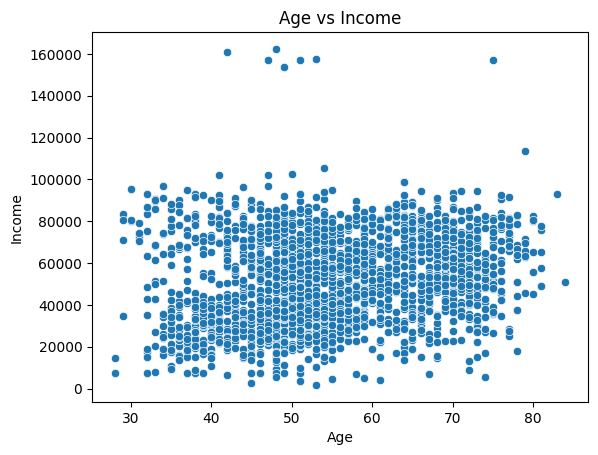

In [ ]:
sns.scatterplot(x='Age', y='Income', data=df)
plt.title("Age vs Income")
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

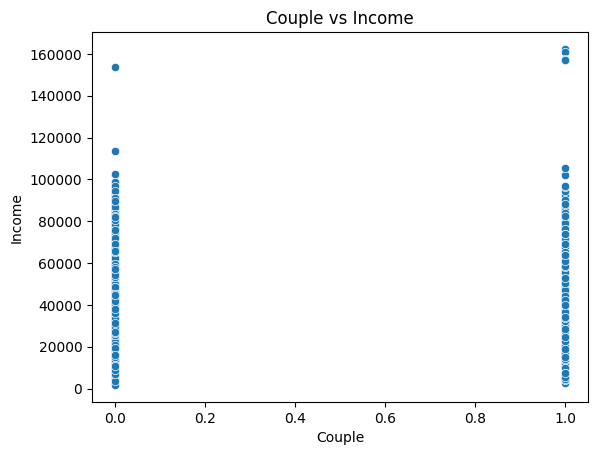

In [ ]:
sns.scatterplot(x='Couple', y='Income', data=df)
plt.title("Couple vs Income")
plt.xlabel('Couple')
plt.ylabel('Income')
plt.show()

**Column : Kidhome and Teenhome**

These columns can be combined into a single column.

In [ ]:
df['child'] = df['Kidhome']+df['Teenhome']
df.drop(['Teenhome'],inplace=True,axis=1)
df

,PostGrad,Income,Couple,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,child
0,0,58138.0,0,0,04-09-2012,58,635,88,546,172,...,0,0,0,0,0,3,11,1,67,0
1,0,46344.0,0,1,08-03-2014,38,11,1,6,2,...,0,0,0,0,0,3,11,0,70,2
2,0,71613.0,1,0,21-08-2013,26,426,49,127,111,...,0,0,0,0,0,3,11,0,59,0
3,0,26646.0,1,1,10-02-2014,26,11,4,20,10,...,0,0,0,0,0,3,11,0,40,1
4,0,58293.0,1,1,19-01-2014,94,173,43,118,46,...,0,0,0,0,0,3,11,0,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,1,0,13-06-2013,46,709,43,182,42,...,0,0,0,0,0,3,11,0,57,1
2236,0,64014.0,1,2,10-06-2014,56,406,0,30,0,...,0,0,1,0,0,3,11,0,78,3
2237,0,56981.0,0,0,25-01-2014,91,908,48,217,32,...,1,0,0,0,0,3,11,0,43,0
2238,1,69245.0,1,0,24-01-2014,8,428,30,214,80,...,0,0,0,0,0,3,11,0,68,1


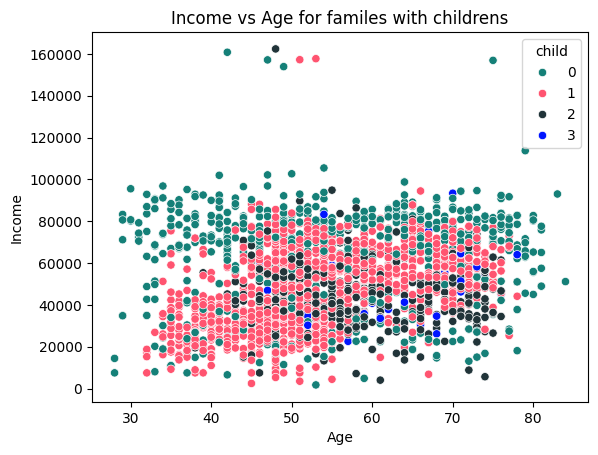

In [ ]:
color_dict = ({0:'#158078',1:'#ff5470',2:'#213439',3:'#0015ff'})
sns.scatterplot(x='Age', y='Income', hue="child", data=df ,palette=color_dict)

plt.title('Income vs Age for familes with childrens')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

**Column : Dt_Customer**

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df

,PostGrad,Income,Couple,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,child
0,0,58138.0,0,0,2012-09-04,58,635,88,546,172,...,0,0,0,0,0,3,11,1,67,0
1,0,46344.0,0,1,2014-03-08,38,11,1,6,2,...,0,0,0,0,0,3,11,0,70,2
2,0,71613.0,1,0,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,3,11,0,59,0
3,0,26646.0,1,1,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,3,11,0,40,1
4,0,58293.0,1,1,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,3,11,0,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,1,0,2013-06-13,46,709,43,182,42,...,0,0,0,0,0,3,11,0,57,1
2236,0,64014.0,1,2,2014-06-10,56,406,0,30,0,...,0,0,1,0,0,3,11,0,78,3
2237,0,56981.0,0,0,2014-01-25,91,908,48,217,32,...,1,0,0,0,0,3,11,0,43,0
2238,1,69245.0,1,0,2014-01-24,8,428,30,214,80,...,0,0,0,0,0,3,11,0,68,1


In [ ]:
df.dtypes

PostGrad                        int64
Income                        float64
Couple                          int64
Kidhome                         int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue                       int64
Response                        int64
Age         

by using this column, we can calcualte the CustomerAge which will tell us how long has an individual been a part of the program

In [ ]:
current_date = datetime.now()
df['Cust_age']=(current_date - df['Dt_Customer']).astype('m8[Y]')
df

,PostGrad,Income,Couple,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,child,Cust_age
0,0,58138.0,0,0,2012-09-04,58,635,88,546,172,...,0,0,0,0,3,11,1,67,0,11.0
1,0,46344.0,0,1,2014-03-08,38,11,1,6,2,...,0,0,0,0,3,11,0,70,2,10.0
2,0,71613.0,1,0,2013-08-21,26,426,49,127,111,...,0,0,0,0,3,11,0,59,0,10.0
3,0,26646.0,1,1,2014-02-10,26,11,4,20,10,...,0,0,0,0,3,11,0,40,1,10.0
4,0,58293.0,1,1,2014-01-19,94,173,43,118,46,...,0,0,0,0,3,11,0,43,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,1,0,2013-06-13,46,709,43,182,42,...,0,0,0,0,3,11,0,57,1,10.0
2236,0,64014.0,1,2,2014-06-10,56,406,0,30,0,...,0,1,0,0,3,11,0,78,3,9.0
2237,0,56981.0,0,0,2014-01-25,91,908,48,217,32,...,0,0,0,0,3,11,0,43,0,10.0
2238,1,69245.0,1,0,2014-01-24,8,428,30,214,80,...,0,0,0,0,3,11,0,68,1,10.0


In [ ]:
df.drop(['Dt_Customer'],inplace = True, axis = 1)
df

,PostGrad,Income,Couple,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,child,Cust_age
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,3,11,1,67,0,11.0
1,0,46344.0,0,1,38,11,1,6,2,1,...,0,0,0,0,3,11,0,70,2,10.0
2,0,71613.0,1,0,26,426,49,127,111,21,...,0,0,0,0,3,11,0,59,0,10.0
3,0,26646.0,1,1,26,11,4,20,10,3,...,0,0,0,0,3,11,0,40,1,10.0
4,0,58293.0,1,1,94,173,43,118,46,27,...,0,0,0,0,3,11,0,43,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,1,0,46,709,43,182,42,118,...,0,0,0,0,3,11,0,57,1,10.0
2236,0,64014.0,1,2,56,406,0,30,0,0,...,0,1,0,0,3,11,0,78,3,9.0
2237,0,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,3,11,0,43,0,10.0
2238,1,69245.0,1,0,8,428,30,214,80,30,...,0,0,0,0,3,11,0,68,1,10.0


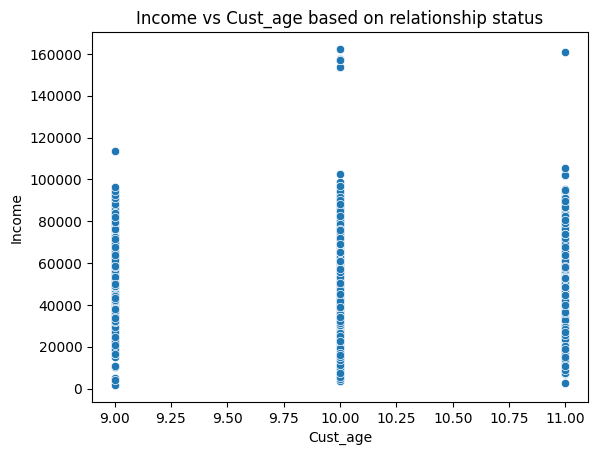

In [ ]:
sns.scatterplot(x='Cust_age', y='Income', data=df)

plt.title('Income vs Cust_age based on relationship status')
plt.xlabel('Cust_age')
plt.ylabel('Income')
plt.show()

First I'm going to eliminate variables that have practically nothing to do with each other, or I don't even know what they are

In [ ]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)
df

,PostGrad,Income,Couple,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,child,Cust_age
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,67,0,11.0
1,0,46344.0,0,1,38,11,1,6,2,1,...,0,0,0,0,0,0,0,70,2,10.0
2,0,71613.0,1,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,59,0,10.0
3,0,26646.0,1,1,26,11,4,20,10,3,...,0,0,0,0,0,0,0,40,1,10.0
4,0,58293.0,1,1,94,173,43,118,46,27,...,0,0,0,0,0,0,0,43,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,1,0,46,709,43,182,42,118,...,0,0,0,0,0,0,0,57,1,10.0
2236,0,64014.0,1,2,56,406,0,30,0,0,...,0,0,0,1,0,0,0,78,3,9.0
2237,0,56981.0,0,0,91,908,48,217,32,12,...,0,1,0,0,0,0,0,43,0,10.0
2238,1,69245.0,1,0,8,428,30,214,80,30,...,0,0,0,0,0,0,0,68,1,10.0


**Amount Spent**

In [ ]:
columnList = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df[columnList].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


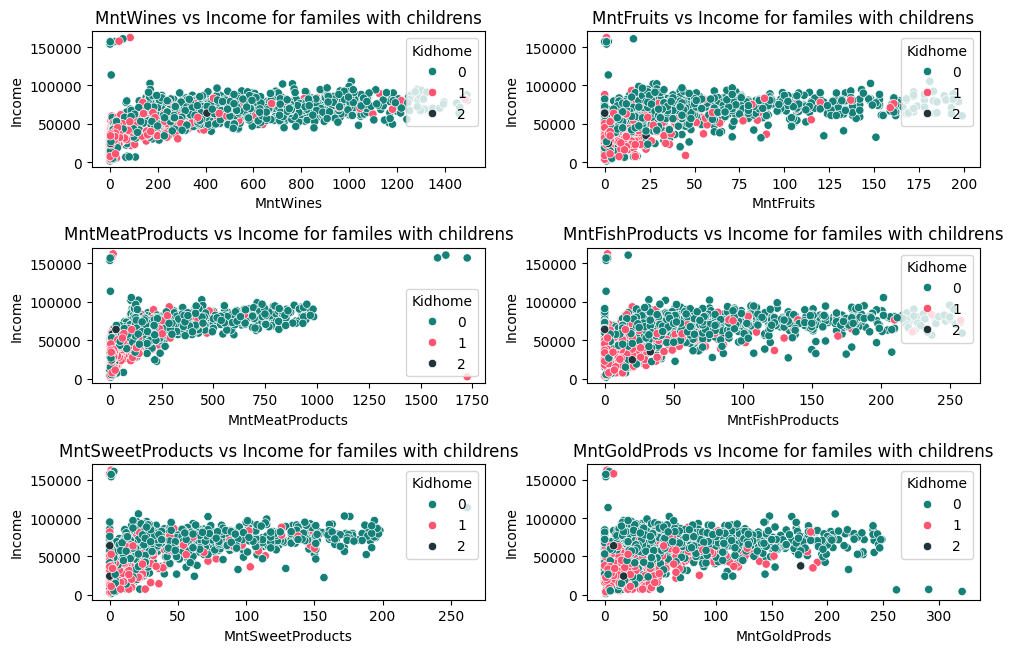

In [ ]:
color_dict = ({0:'#158078',1:'#ff5470',2:'#213439'})
plt.subplots(figsize=(10, 30))
for i, column in enumerate(df[columnList].columns):
    plt.subplot(len(df.columns)//2 + 1, 2, i+1,)
    sns.scatterplot(x= column , y='Income', hue="Kidhome", data=df, palette= color_dict)
    plt.title(column + " vs Income for familes with childrens")
    plt.tight_layout()

plt.show()

In [ ]:
df['mntspent'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],axis=1,inplace=True)
df

,PostGrad,Income,Couple,Kidhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,child,Cust_age,mntspent
0,0,58138.0,0,0,58,3,8,10,4,7,...,0,0,0,0,0,1,67,0,11.0,1617
1,0,46344.0,0,1,38,2,1,1,2,5,...,0,0,0,0,0,0,70,2,10.0,27
2,0,71613.0,1,0,26,1,8,2,10,4,...,0,0,0,0,0,0,59,0,10.0,776
3,0,26646.0,1,1,26,2,2,0,4,6,...,0,0,0,0,0,0,40,1,10.0,53
4,0,58293.0,1,1,94,5,5,3,6,5,...,0,0,0,0,0,0,43,1,10.0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,1,0,46,2,9,3,4,5,...,0,0,0,0,0,0,57,1,10.0,1341
2236,0,64014.0,1,2,56,7,8,2,5,7,...,0,0,1,0,0,0,78,3,9.0,444
2237,0,56981.0,0,0,91,1,2,3,13,6,...,1,0,0,0,0,0,43,0,10.0,1241
2238,1,69245.0,1,0,8,2,6,5,10,3,...,0,0,0,0,0,0,68,1,10.0,843


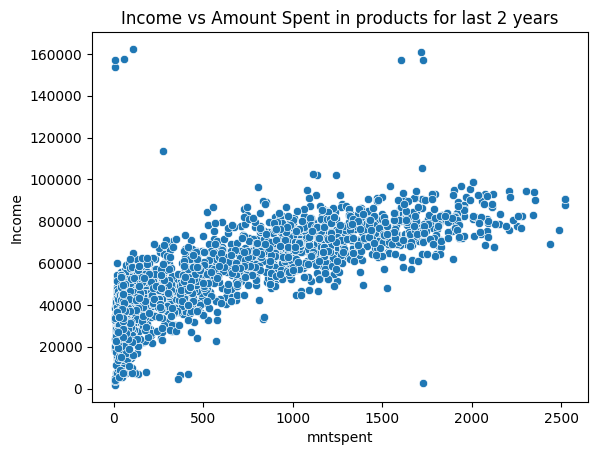

In [ ]:
sns.scatterplot(x='mntspent', y='Income', data=df)

plt.title('Income vs Amount Spent in products for last 2 years')
plt.xlabel('mntspent')
plt.ylabel('Income')
plt.show()

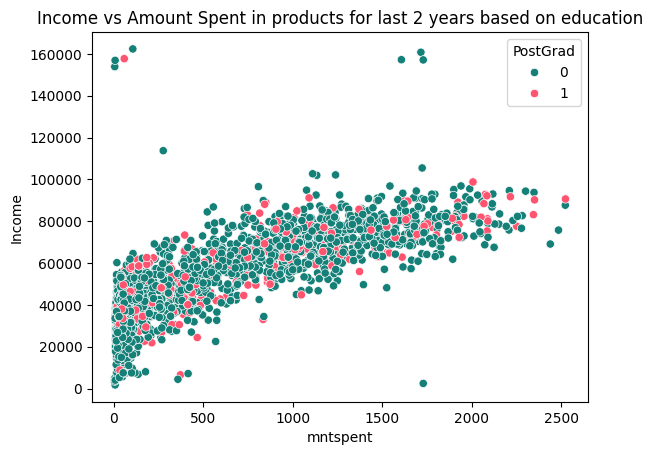

In [ ]:
color_dict = ({0:'#158078',1:'#ff5470'})
sns.scatterplot(x='mntspent', y='Income',hue='PostGrad', data=df ,palette=color_dict)

plt.title('Income vs Amount Spent in products for last 2 years based on education')
plt.xlabel('mntspent')
plt.ylabel('Income')
plt.show()

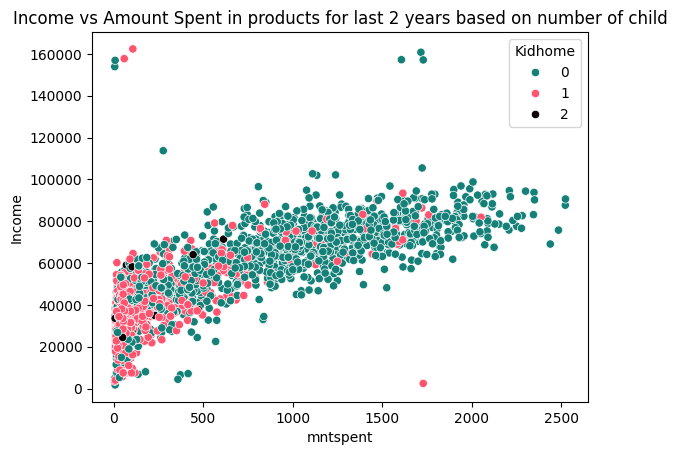

In [ ]:
color_dict = ({0:'#158078',1:'#ff5470',2:'#0C0404'})
sns.scatterplot(x='mntspent', y='Income',hue='Kidhome', data=df ,palette=color_dict)

plt.title('Income vs Amount Spent in products for last 2 years based on number of child')
plt.xlabel('mntspent')
plt.ylabel('Income')
plt.show()

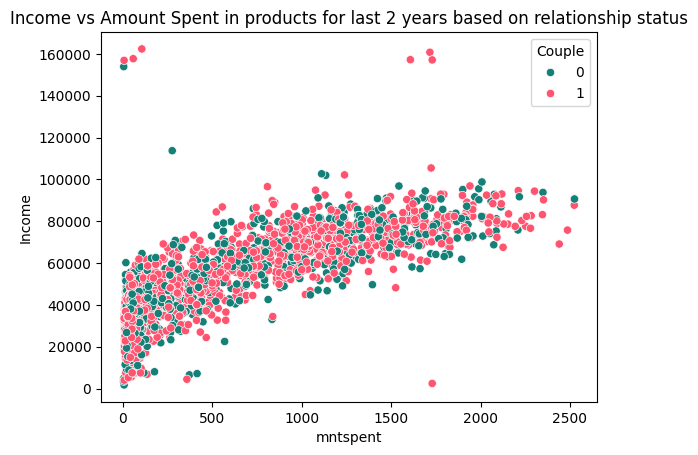

In [ ]:
color_dict = ({0:'#158078',1:'#ff5470'})
sns.scatterplot(x='mntspent', y='Income',hue='Couple', data=df ,palette=color_dict)

plt.title('Income vs Amount Spent in products for last 2 years based on relationship status')
plt.xlabel('mntspent')
plt.ylabel('Income')
plt.show()

<Axes: >

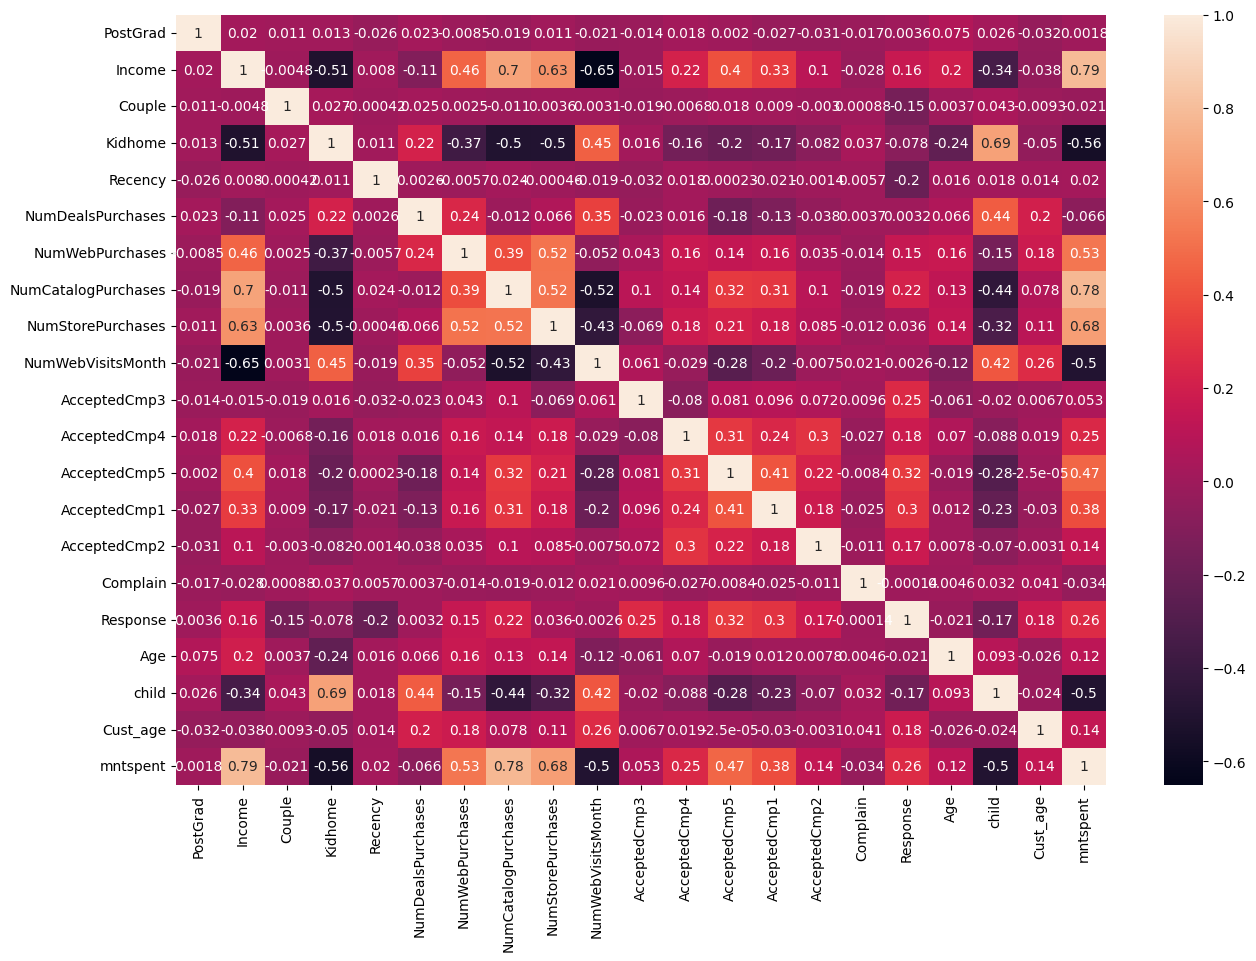

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)

In [ ]:
df.dtypes

PostGrad                 int64
Income                 float64
Couple                   int64
Kidhome                  int64
Recency                  int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
child                    int64
Cust_age               float64
mntspent                 int64
dtype: object

#<h1> <center> <font color = 'Orange'> **Feature Scaling**

In [ ]:
# Perform Feature Scaling
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaledX = Scaler.fit_transform(df)
scaledX = pd.DataFrame(scaledX, columns=list(df.columns))
scaledX

,PostGrad,Income,Couple,Kidhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,child,Cust_age,mntspent
0,-0.444542,0.287105,-1.349603,-0.822754,0.310353,0.351030,1.426865,2.503607,-0.555814,0.692181,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,2.375425,1.018352,-1.264598,1.181484,1.676245
1,-0.444542,-0.260882,-1.349603,1.040021,-0.380813,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,1.274785,1.404572,-0.328304,-0.963297
2,-0.444542,0.913196,0.740959,-0.822754,-0.795514,-0.688432,1.426865,-0.229679,1.290224,-0.544908,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.334530,-1.264598,-0.328304,0.280110
3,-0.444542,-1.176114,0.740959,1.040021,-0.795514,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.289547,0.069987,-0.328304,-0.920135
4,-0.444542,0.294307,0.740959,1.040021,1.554453,1.390492,0.332600,0.111982,0.059532,-0.132545,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.033114,0.069987,-0.328304,-0.307562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.444542,0.430444,0.740959,-0.822754,-0.104347,-0.168701,1.791619,0.111982,-0.555814,-0.132545,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.163575,0.069987,-0.328304,1.218061
2208,-0.444542,0.560123,0.740959,2.902796,0.241237,2.429954,1.426865,-0.229679,-0.248141,0.692181,...,-0.282981,-0.280175,3.818045,-0.117256,-0.09552,-0.420977,1.958607,2.739158,-1.838091,-0.271040
2209,-0.444542,0.233347,-1.349603,-0.822754,1.450778,-0.688432,-0.761665,0.111982,2.213242,0.279818,...,3.533809,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.033114,-1.264598,-0.328304,1.052052
2210,2.249505,0.803172,0.740959,-0.822754,-1.417564,-0.168701,0.697355,0.795303,1.290224,-0.957271,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,1.103830,0.069987,-0.328304,0.391336


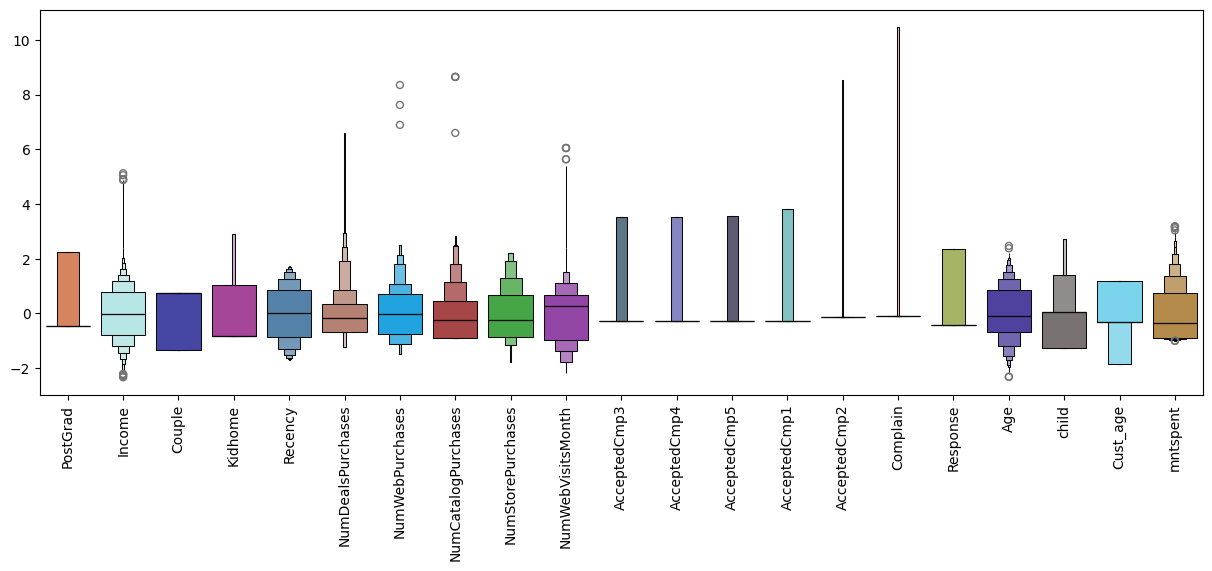

In [ ]:
color_dict = ({'NumWebPurchases':'#00aFFF','AcceptedCmp5':'#02002f','Couple':'#3636B5', 'Age':'#4333AD','NumDealsPurchases':'#BF7B68',
               'NumWebVisitsMonth':'#9C36B5','AcceptedCmp4':'#3636B5','Recency':'#4682b6','NumStorePurchases':'#36B536','mntspent': '#C68E3A',
               'Complain':'#FF3300','AcceptedCmp3':'#003153','Kidhome':'#B636A3','PostGrad':'#E66020','NumCatalogPurchases':'#B63636','child':'#7A7171',
               'AcceptedCmp2':'#24000b','Cust_age':'#69DFFF','Response':'#9CB536','Income':'#AFEEEE','AcceptedCmp1':'#36B5B5'})
plt.figure(figsize=(15,5))
sns.boxenplot(data = scaledX, palette = color_dict)
plt.xticks(rotation=90)

plt.show()

#<h1> <center> <font color = 'Orange'> **Training Model**


#**K-Means Clustering**

In [ ]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i,random_state=42)
  km.fit(scaledX)
  wcss.append(km.inertia_)

find out elbow point

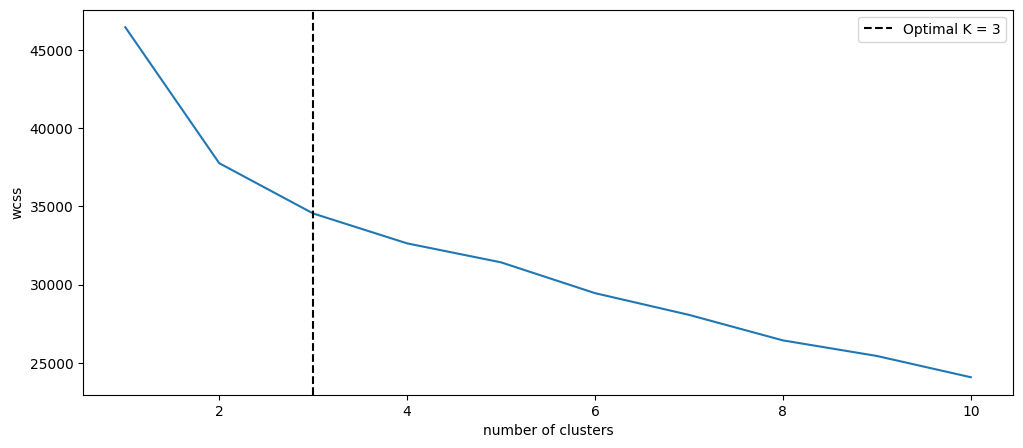

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.plot(range(1,11),wcss)

plt.axvline(x=3, color='black', linestyle='--', label="Optimal K = 3")
plt.legend()

plt.show()

we will use K-Means to get3 clusters.

In [ ]:
km = KMeans(n_clusters=3,random_state=10)
y_kms = km.fit_predict(scaledX)
df.insert(0,'Cluster',y_kms)
df

,Cluster,PostGrad,Income,Couple,Kidhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,child,Cust_age,mntspent
0,1,0,58138.0,0,0,58,3,8,10,4,...,0,0,0,0,0,1,67,0,11.0,1617
1,2,0,46344.0,0,1,38,2,1,1,2,...,0,0,0,0,0,0,70,2,10.0,27
2,1,0,71613.0,1,0,26,1,8,2,10,...,0,0,0,0,0,0,59,0,10.0,776
3,2,0,26646.0,1,1,26,2,2,0,4,...,0,0,0,0,0,0,40,1,10.0,53
4,2,0,58293.0,1,1,94,5,5,3,6,...,0,0,0,0,0,0,43,1,10.0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,0,61223.0,1,0,46,2,9,3,4,...,0,0,0,0,0,0,57,1,10.0,1341
2236,2,0,64014.0,1,2,56,7,8,2,5,...,0,0,1,0,0,0,78,3,9.0,444
2237,1,0,56981.0,0,0,91,1,2,3,13,...,1,0,0,0,0,0,43,0,10.0,1241
2238,1,1,69245.0,1,0,8,2,6,5,10,...,0,0,0,0,0,0,68,1,10.0,843


we got 3 clusters, which can be named as


*   Low Income, Low Expeniture
*   Medium Income, Medium Expenditure
*   High Income , High Expenditure



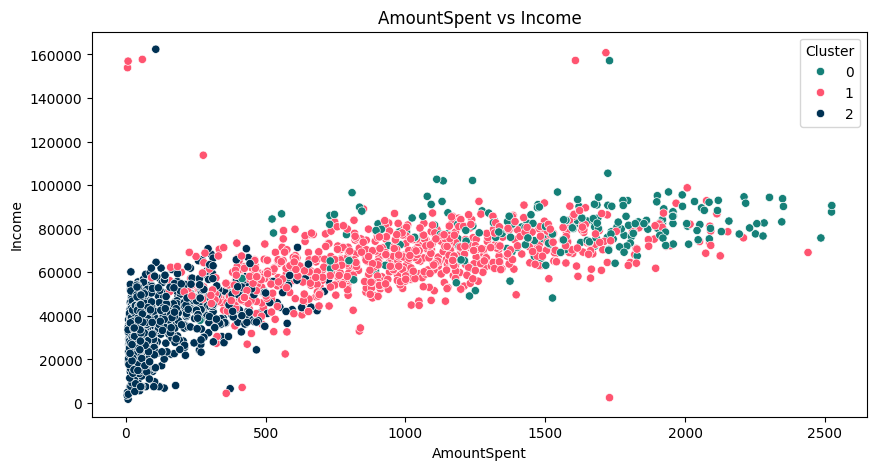

In [ ]:
plt.figure(figsize=(10,5))
color_dict = ({0:'#158078',1:'#ff5470',2:'#003153'})

sns.scatterplot(x='mntspent', y='Income', hue="Cluster", data=df, palette=color_dict)

plt.title('AmountSpent vs Income')
plt.xlabel('AmountSpent')
plt.ylabel('Income')
plt.show()

#**Agglomerative Hierarchical Clustering**

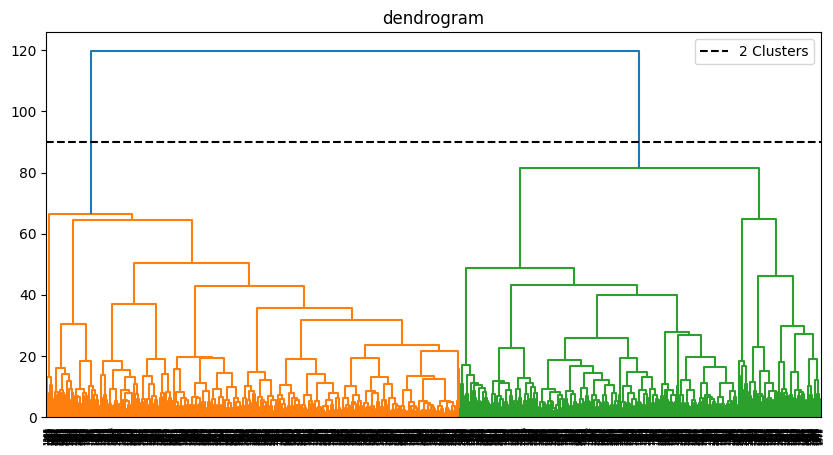

In [ ]:
plt.figure(figsize=(10,5))
dend = shc.dendrogram(shc.linkage(scaledX,method='ward'))
plt.title('dendrogram')

# Divide the largest non-intersecting line
plt.axhline(y=90, color='black', linestyle='--', label="2 Clusters")
plt.legend()

plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2,affinity = 'euclidean',linkage ='ward')
y_clust = cluster.fit_predict(scaledX)
y_clust

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
df1 = df.copy()
df1['Cluster']=y_clust
df1

,Cluster,PostGrad,Income,Couple,Kidhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,child,Cust_age,mntspent
0,0,0,58138.0,0,0,58,3,8,10,4,...,0,0,0,0,0,1,67,0,11.0,1617
1,1,0,46344.0,0,1,38,2,1,1,2,...,0,0,0,0,0,0,70,2,10.0,27
2,0,0,71613.0,1,0,26,1,8,2,10,...,0,0,0,0,0,0,59,0,10.0,776
3,1,0,26646.0,1,1,26,2,2,0,4,...,0,0,0,0,0,0,40,1,10.0,53
4,1,0,58293.0,1,1,94,5,5,3,6,...,0,0,0,0,0,0,43,1,10.0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,61223.0,1,0,46,2,9,3,4,...,0,0,0,0,0,0,57,1,10.0,1341
2236,1,0,64014.0,1,2,56,7,8,2,5,...,0,0,1,0,0,0,78,3,9.0,444
2237,0,0,56981.0,0,0,91,1,2,3,13,...,1,0,0,0,0,0,43,0,10.0,1241
2238,0,1,69245.0,1,0,8,2,6,5,10,...,0,0,0,0,0,0,68,1,10.0,843


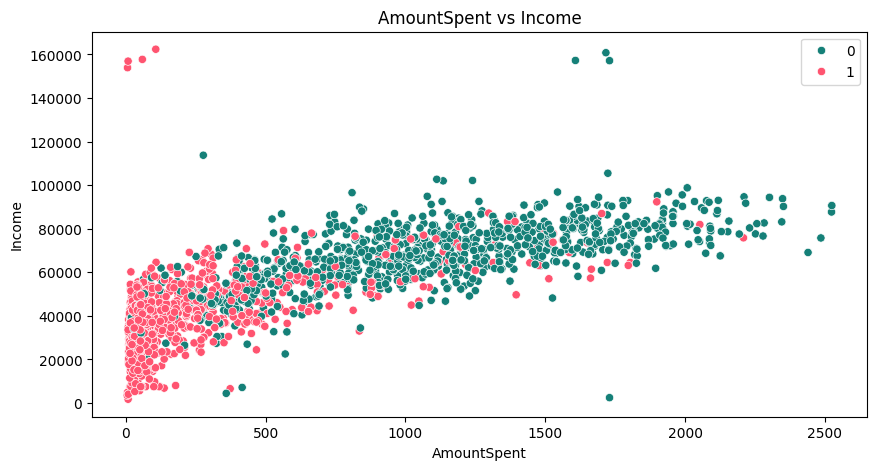

In [ ]:
plt.figure(figsize=(10,5))
color_dict = ({0:'#158078',1:'#ff5470'})

sns.scatterplot(x='mntspent', y='Income', hue=y, data=df, palette=color_dict)

plt.title('AmountSpent vs Income')
plt.xlabel('AmountSpent')
plt.ylabel('Income')
plt.show()

these are the two clusters ,

* Low Income, Low Expenditure

* High Income, High Expenditure

But, due to the better performnce of K-Means Clustering we will use it for drawing conclusions insted of agglomerative heirarchial clustering.

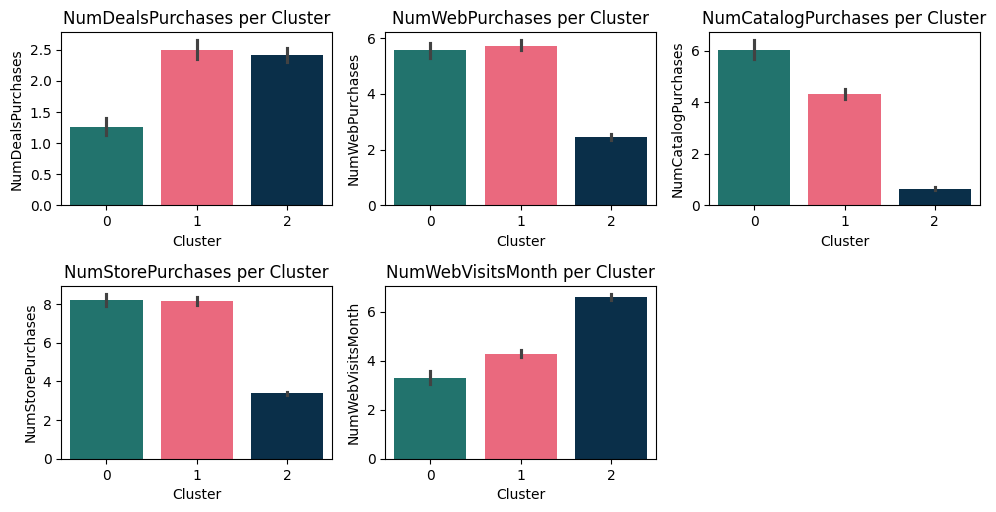

In [ ]:
columnList = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
color_dict = ({'0':'#158078','1':'#ff5470','2':'#003153'})
plt.figure(figsize=(10,20))
for i, column in enumerate(df[columnList].columns):
    plt.subplot(len(df.columns)//3 + 1, 3, i+1,)  # Create subplots
    sns.barplot(x='Cluster' , y=column, data=df, palette=color_dict)
    plt.title(column + " per Cluster")
    plt.tight_layout()

# Show the plot
plt.show()


* Low Income, Low Expenditure group group made most visits to the website but did not purchase as much as the Moderate Income, Moderate Expenditure group. Hence we can avoid this group as target audiance for commericals.

* Moderate Income, Moderate Expenditure group claimed most of the deals

* High Income, High Expenditure group made the most catalog purchases and store pruchases, a significant amount of people in this group visited the website and made purhcases online.